# Capstone Project: Used Cars Price Prediction

# Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed
down in the recent past, the pre-owned car market has continued to grow over the past few years
and is now larger than the new car market. Cars4U is a budding tech start-up that aims to find
footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand
cars were bought and sold. There is a slowdown in new car sales and that could mean that the
demand is shifting towards the pre-owned market. In fact, some car owners replace their old
vehicles with pre-owned cars instead of buying a new automobile.

Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original
Equipment Manufacturer / except for dealership level discounts which come into play only in the last
stage of the customer journey), the used car market is a very different beast, with large uncertainties
in both pricing and supply. Several factors, including mileage, brand, model, year, etc. can influence
the actual worth of a car. From the perspective of a seller, it is not an easy task to set the correct
price of a used car. Keeping this in mind, the pricing scheme of these used cars becomes important
in order to grow in the market.

# Objective

Come up with a pricing model that can effectively predict the price of used cars and can help the
business in devising profitable strategies using differential pricing.

# Dataset

The used_cars dataset contains the following attributes:

- **S.No.**: Serial Number
- **Name**: Name of the car which includes Brand name and Model name
- **Location**: The location in which the car is being sold or is available for purchase (Cities)
- **Year**: Manufacturing year of the car
- **Kilometers_driven**: The total kilometers driven in the car by the previous owner(s) in KM
- **Fuel_Type**: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- **Transmission**: The type of transmission used by the car (Automatic / Manual)
- **Owner**: Type of ownership
- **Mileage**: The standard mileage offered by the car company in KMPL or KM/KG
- **Engine**: The displacement volume of the engine in CC
- **Power**: The maximum power of the engine in BHP
- **Seats**: The number of seats in the car
- **New_Price**: The price of a new car of the same model in INR 100,000
- **Price**: The price of the used car in INR 100,000

### 1) Importing required libraries

In [136]:
# Libraries for data manipulation
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# Libraries for building regression models
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from statsmodels.stats import diagnostic as diag
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import pylab
import scipy.stats as stat
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

### 2) Load and read the dataset

In [137]:
#Load dataset
df = pd.read_csv("used_cars.csv")
#Check headers
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [138]:
#Check for extra rows at the end, e.g. "Total"
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


**Observations:**
* The target variable is the price of used cars indicated by variable `Price`.
* We will use the other independent variables to predict that price.
* Categorical variable `Name` contains brand, model, and modification, which will not be useful for further analysis. This column can be split in order to extract additional insights from the data.

### 3) Get general information about the dataset and prepare the data

In [139]:
#Obtain basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


**Observations:**
* The dataset now contains 7253 rows and 14 columns.
* Columns `Mileage`, `Engine`, `Power`, `Seats`, `New_price`, and `Price` all have missing values.
* The dataset consists of both numeric and string columns.
* `Name`, `Location`, `Fuel_Type`, `Transmission`, and `Owner_Type` are categorical variables.

In [140]:
#Check the percentage of missing values in each column
(df.isnull().sum()/df.shape[0])*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 2.412795
Seats                 0.730732
New_price            86.129877
Price                17.013650
dtype: float64

**Observations:**
* Columns `Mileage`, `Engine`, `Power`, and `Seats` all have very low percentage of missing values.
* Due to this low percentage and the nature of these numerical variables, we can impute missing values by their `median`, rather than using `mean` for example, where we would get decimal values for number of seats and engine size.
* Column `New_price` has the highest share of missing values (86%), which however seems normal given that the dataset consists of mainly older cars (2013 make on average), which are no longer produced and sold as new. Missing values can be imputed using median new price per Brand/Model combination.
* The target variable `Price` has about 17% missing values. Imputing these would introduce bias since 1,234 car prices would be artificially created. Therefore, it is safer to completely **remove these rows** from the dataset. 

#### Feature Engineering

In [141]:
#Split the `Name` column into `Brand`, `Model, and `Modification`
df[['Brand','Modification']] =  df['Name'].str.split(" ", n=1, expand=True)
df[['Model','Modification']] =  df['Modification'].str.split(" ", n=1, expand=True)

#Create a new column `Brand_Model` to be used for price imputation
df['Brand_Model'] = df['Brand'] + ' ' + df['Model']

#Drop columns `Model` and `Modification` as they will not be used further
df = df.drop(['Model'], axis=1)
df = df.drop(['Modification'], axis=1)

df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Brand,Brand_Model
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,Maruti Wagon
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Hyundai Creta
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda,Honda Jazz
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,Maruti Ertiga
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,Audi A4


**Observations:**
* Variable `S.No.` is an identifier, therefore we can assume it doesn't have any predictive power to predict the target variable `Price`, hence it can be removed.
* As we now have the `Brand` and `Brand_Model` extracted into separate columns, column `Name` becomes redundant and can be dropped too.

In [142]:
#Remove ID column `S.No.` from the dataset
df = df.drop(['S.No.'], axis=1)

#Remove redundant column `Name` from the dataset
df = df.drop(['Name'], axis=1)

### 4) Check summary statistics of the dataset

In [143]:
#Summary statistics for numerical variables
Summary_Num = df.describe().T

#Add a calculated column to show Standard Deviation percentage
Summary_Num['Std %'] = Summary_Num['std']/Summary_Num['mean']

#Format columns
Summary_Num.style.format({'count': '{0:}', 'mean': '{0:.2f}', 'std': '{0:.2f}', 'min': '{0:.2f}', '25%': '{0:.2f}', '50%': '{0:.2f}', '75%': '{0:.2f}', 'max': '{0:.2f}', 'Std %': '{:.2%}'})

,count,mean,std,min,25%,50%,75%,max,Std %
Year,7253.0,2013.37,3.25,1996.00,2011.00,2014.00,2016.00,2019.00,0.16%
Kilometers_Driven,7253.0,58699.06,84427.72,171.00,34000.00,53416.00,73000.00,6500000.00,143.83%
Mileage,7251.0,18.14,4.56,0.00,15.17,18.16,21.10,33.54,25.15%
Engine,7207.0,1616.57,595.29,72.00,1198.00,1493.00,1968.00,5998.00,36.82%
Power,7078.0,112.77,53.49,34.20,75.00,94.00,138.10,616.00,47.44%
Seats,7200.0,5.28,0.81,2.00,5.00,5.00,5.00,10.00,15.33%
New_price,1006.0,22.78,27.76,3.91,7.88,11.57,26.04,375.00,121.86%
Price,6019.0,9.48,11.19,0.44,3.50,5.64,9.95,160.00,118.02%


In [144]:
#Summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952
Brand,7253,33,Maruti,1444
Brand_Model,7253,223,Maruti Swift,418


**Observations:**

___Numerical variables:___

* `Year` - The dataset contains new and second-hand cars, manufactured between 1996 and 2019.
* `Kilometers_Driven` - This column has a very high range (171 - 6,500,000 km). A few of the extreme values **need to be checked** in order to get a sense of the data.
* `Mileage` - The minimum value in this column is 0 which is concerning and **needs to be checked**.
* `Engine` - In terms of engine displacement, there is a huge gap between the lowest value (72 CC) and the 1st quartile (1198 CC), after which point capacity moves gradually to the 2nd (1493 CC) and 3rd (1969 CC) quartile. This is an indication of a potential outlier that **must be investigated further**.
* `Power` - Powertrains vary from very small 34 BHP all the way up to 616 BHP, which seems normal given the variety of vehicles in the list.
* `Seats` - Cars in the dataset have 5 seats on average, which is seems right.
* `New_price` - The new price range looks normal. The *mean* value is twice the *median*, suggesting there are a few high-end brands, which makes sense.
* `Price` - The price range is understandably high, as there are cars worth less than 1k Rupees, and some worth 160k.
* Standard deviation is very high for variables `Kilometers_Driven`, `New_price`, and `Price`, which can be expected as the dataset contains brand new cars (0 mileage) as well as units produced back in 1996, also some new "low-cost" models (e.g., Maruti Alto K10) vs. high-end vehicles (e.g., Mercedes-Benz S-Class).

___Categorical variables:___

* `Location` - Vehicles are located in 11 different cities, mostly in Mumbai.
* `Fuel_Type` - There are 5 different types of fuel used, mostly Diesel. 
* `Transmission` - The majority of cars in the dataset have manual transmission, but there is also a good number of automatics.
* `Owner_Type` - Most of the cars had only one owner so far.
* `Brand` - The dataset contains cars representing 33 brands, with ***Maruti*** being the most frequent (20% share).
* `Brand_Model` - There are 223 Brand/Model combinations, of which ***Maruti Swift*** is the most common (418).

### 5) Univariate analysis

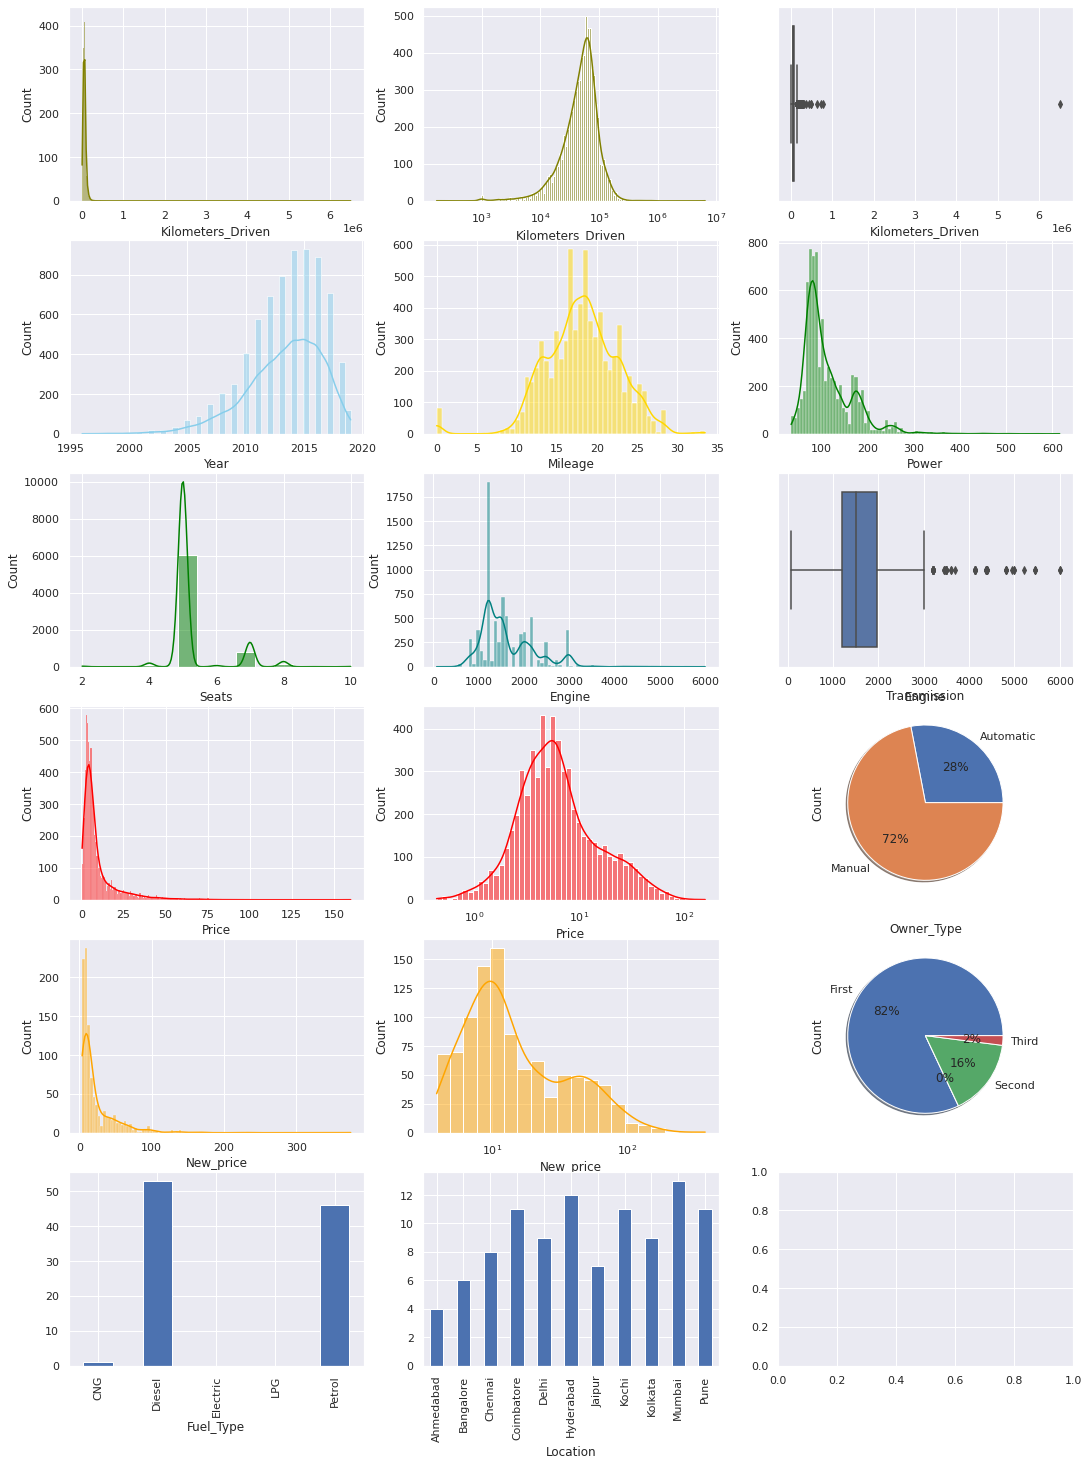

In [145]:
#Check variables distribution

sns.set(style="darkgrid")

fig, axs = plt.subplots(6, 3, figsize=(18, 25))

sns.histplot(data=df, x="Kilometers_Driven", kde=True, color="olive", ax=axs[0, 0])
sns.histplot(data=df, x="Kilometers_Driven", kde=True, color="olive", ax=axs[0, 1], log_scale=True)
sns.boxplot(data=df, x="Kilometers_Driven", ax=axs[0, 2])

sns.histplot(data=df, x="Year", kde=True, color="skyblue", ax=axs[1, 0])
sns.histplot(data=df, x="Mileage", kde=True, color="gold", ax=axs[1, 1])
sns.histplot(data=df, x="Power", kde=True, color="green", ax=axs[1, 2])

sns.histplot(data=df, x="Seats", kde=True, color="green", ax=axs[2, 0])
sns.histplot(data=df, x="Engine", kde=True, color="teal", ax=axs[2, 1])
sns.boxplot(data=df, x="Engine", ax=axs[2, 2])

sns.histplot(data=df, x="Price", kde=True, color="red", ax=axs[3, 0])
sns.histplot(data=df, x="Price", kde=True, color="red", ax=axs[3, 1], log_scale=True)

sns.histplot(data=df, x="New_price", kde=True, color="orange", ax=axs[4, 0])
sns.histplot(data=df, x="New_price", kde=True, color="orange", ax=axs[4, 1], log_scale=True)

df_Fuel = df.groupby('Fuel_Type')['Fuel_Type'].count()
df_Fuel = df_Fuel.div(df_Fuel.sum().astype(float)).round(2)*100
df_Fuel.plot.bar(x='Count', y = "Fuel_Type", ax=axs[5,0])

df_Transmission = df.groupby('Transmission')['Transmission'].count()
df_Transmission = df_Transmission.div(df_Transmission.sum().astype(float)).round(2)*100
df_Transmission.plot.pie(label=('Count'), title = "Transmission", autopct='%1.0f%%', shadow='True', ax=axs[3,2]) 

df_Owner = df.groupby('Owner_Type')['Owner_Type'].count()
df_Owner = df_Owner.div(df_Owner.sum().astype(float)).round(2)*100
df_Owner.plot.pie(label=('Count'), title = "Owner_Type", autopct='%1.0f%%', shadow='True', ax=axs[4,2])

df_Location = df.groupby('Location')['Location'].count()
df_Location = df_Location.div(df_Location.sum().astype(float)).round(2)*100
df_Location.plot.bar(x='Count', y = "Location", ax=axs[5,1])

plt.show()

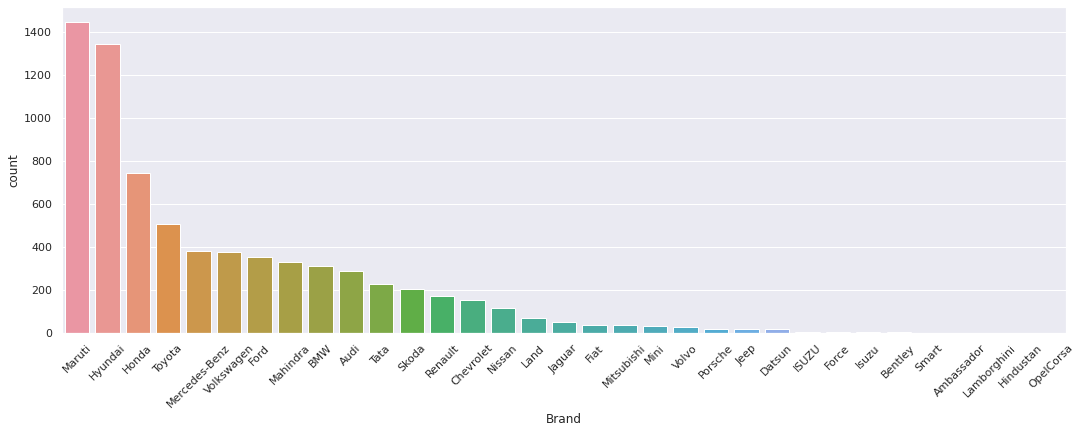

In [146]:
#Check `Brand` distribution
fig= plt.figure(figsize=(18, 6))
sns.countplot(x='Brand', data=df, order=df['Brand'].value_counts().index);
plt.xticks(rotation=45);

<AxesSubplot:xlabel='Price', ylabel='Brand'>

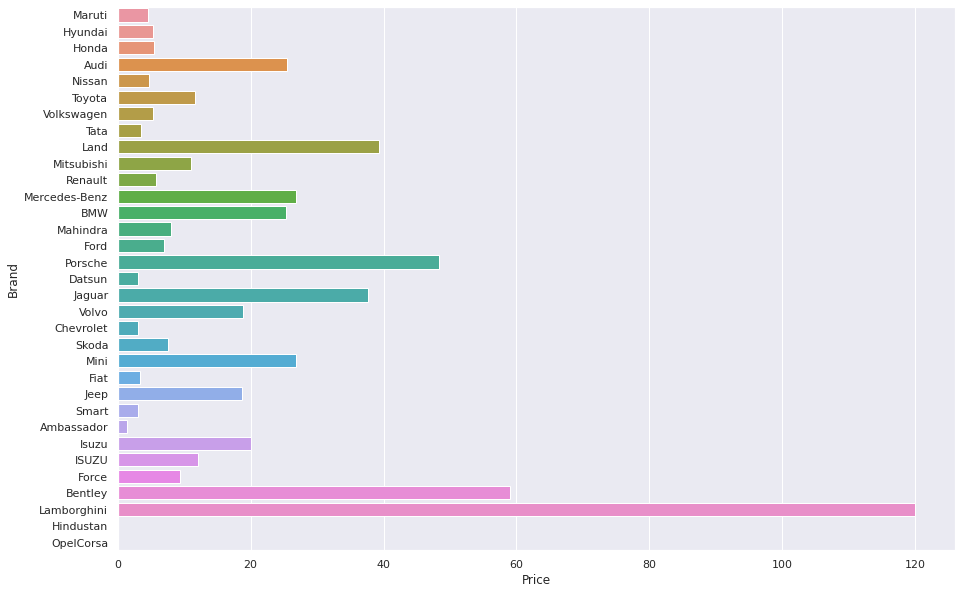

In [147]:
#Check the mean `Price` per `Brand`
plt.figure(figsize=(15,10))
sns.barplot('Price', 'Brand', data=df, ci=False)

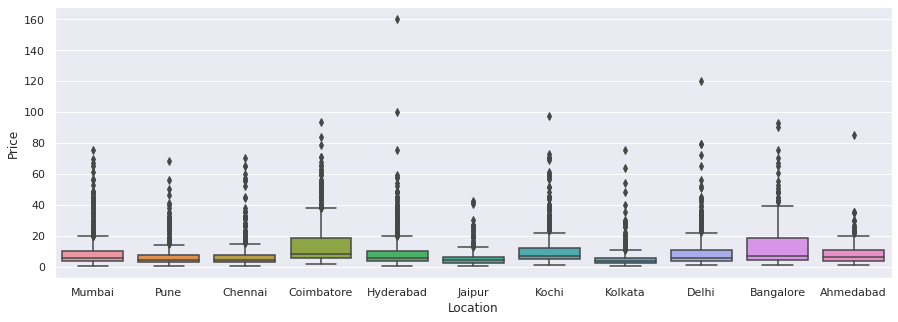

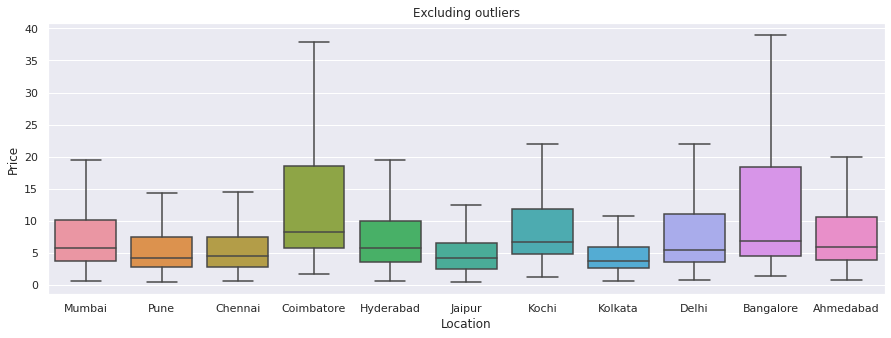

In [148]:
#Check used cars prices per Location
plt.figure(figsize=(15, 5))
sns.boxplot(x=df['Location'], y=df['Price'])
plt.show()
plt.figure(figsize=(15, 5))

#Exclude outliers
plt.title('Excluding outliers')
sns.boxplot(x=df['Location'], y=df['Price'],showfliers=False)
plt.show()

In [149]:
#Check for outliers in `Kilometers_Driven`
df.loc[df['Kilometers_Driven'] > 100000].sort_values(by=['Kilometers_Driven'], ascending=False).head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Brand,Brand_Model
2328,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.0,BMW,BMW X5
340,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.5,Skoda,Skoda Octavia
1860,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.9,Volkswagen,Volkswagen Vento
358,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.7,Hyundai,Hyundai i10
2823,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.0,Volkswagen,Volkswagen Jetta


In [150]:
#Check for entries with unusually small engine displacement (<500 CC)
df.loc[df['Engine'] < 500].sort_values(by=['Engine'], ascending=True)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Brand,Brand_Model
4446,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.0,Mahindra,Mahindra E


In [151]:
#Check fuel types
df['Fuel_Type'].value_counts()

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

**Observations:**
* There is indeed an outlier in terms of engine capacity. However, this is not due to a data entry/other error - Mahindra E Verito D4 is an electric vehicle with a 72 CC engine producing 41 BHP.
* As visible from the pivot above, there are only 2 electric cars in the dataset, therefore I prefer to keep the outlier so that each fuel type is represented by at least two units.

In [152]:
#Check number of cars with 0 mileage
(df['Mileage'] == 0).sum()

81

**Observations:**
* Variable `Kilometers_Driven` is extremely right skewed, which is normal given the combination of old and new cars in the dataset. In order to reduce skewness, we can use Log transformation, which shows that most of the cars were driven between 60k and 90k kilometers.
    * There is clearly an outlier here - a car manufactured in 2017 that has supposedly been driven 6,500,000 km.
    * The are a few more cars that have been driven a lot, but this seems reasonable given their year of manufacture.
* `Year` follows a Poisson distribution showing that most of the cars in the dataset were produced between 2014 and 2016.
* `Mileage` is normally distributed, with km/l for most vehicles in the range 15-20. There are also 83 cars with 0 mileage. This doesn't seem valid, therefore such observations should be treated as missing values.
* `Power` is right skewed.
* The distribution of `Seats` shows that the majority of vehicles have 5 doors.
* All other variables are positively skewed. Price-wise we have most of the units within the 10k-20k range.
* `Seats` - The histogram shows that about 60% of the cars have 5 seats.
* `Engine` - There is indeed an outlier in terms of engine capacity. However, this is not due to an error. *Mahindra E Verito D4* is an electric vehicle with a 72 CC engine producing 41 BHP.
    * There are only 2 electric cars in the dataset, therefore it's better to keep the outlier so that each fuel type is represented by at least two units.
* `Price` and `New_price` are highly skewed. We use Log transformation to reduce skewness.
* `Fuel_Type` - About 53% of the cars have Diesel engines, followed by 46% with Petrol engines.
* `Transmission` - 72% of the cars have manual transmission.
* `Owner_Type` - 82% of the cars had only one owner so far, followed by 16% with two.
* `Location` - Around 13% of the vehicles are located in Mumbai, followed by 12% in Hyderabad.
* `Brand` - 1444 (20%) of the cars in the dataset are ***Maruti***. The most expensive brand is ***Lamborghini*** with a mean price of 120k Rupee, followed by ***Bentley*** and ***Porsche***.

In [153]:
#Add Log-transformed features to the dataset

#kilometers_driven_log
df["kilometers_driven_log"] = np.log(df["Kilometers_Driven"])

#price_log
df["price_log"] = np.log(df["Price"])

#new_price_log
df["new_price_log"] = np.log(df["New_price"])

### 6) Bivariate analysis

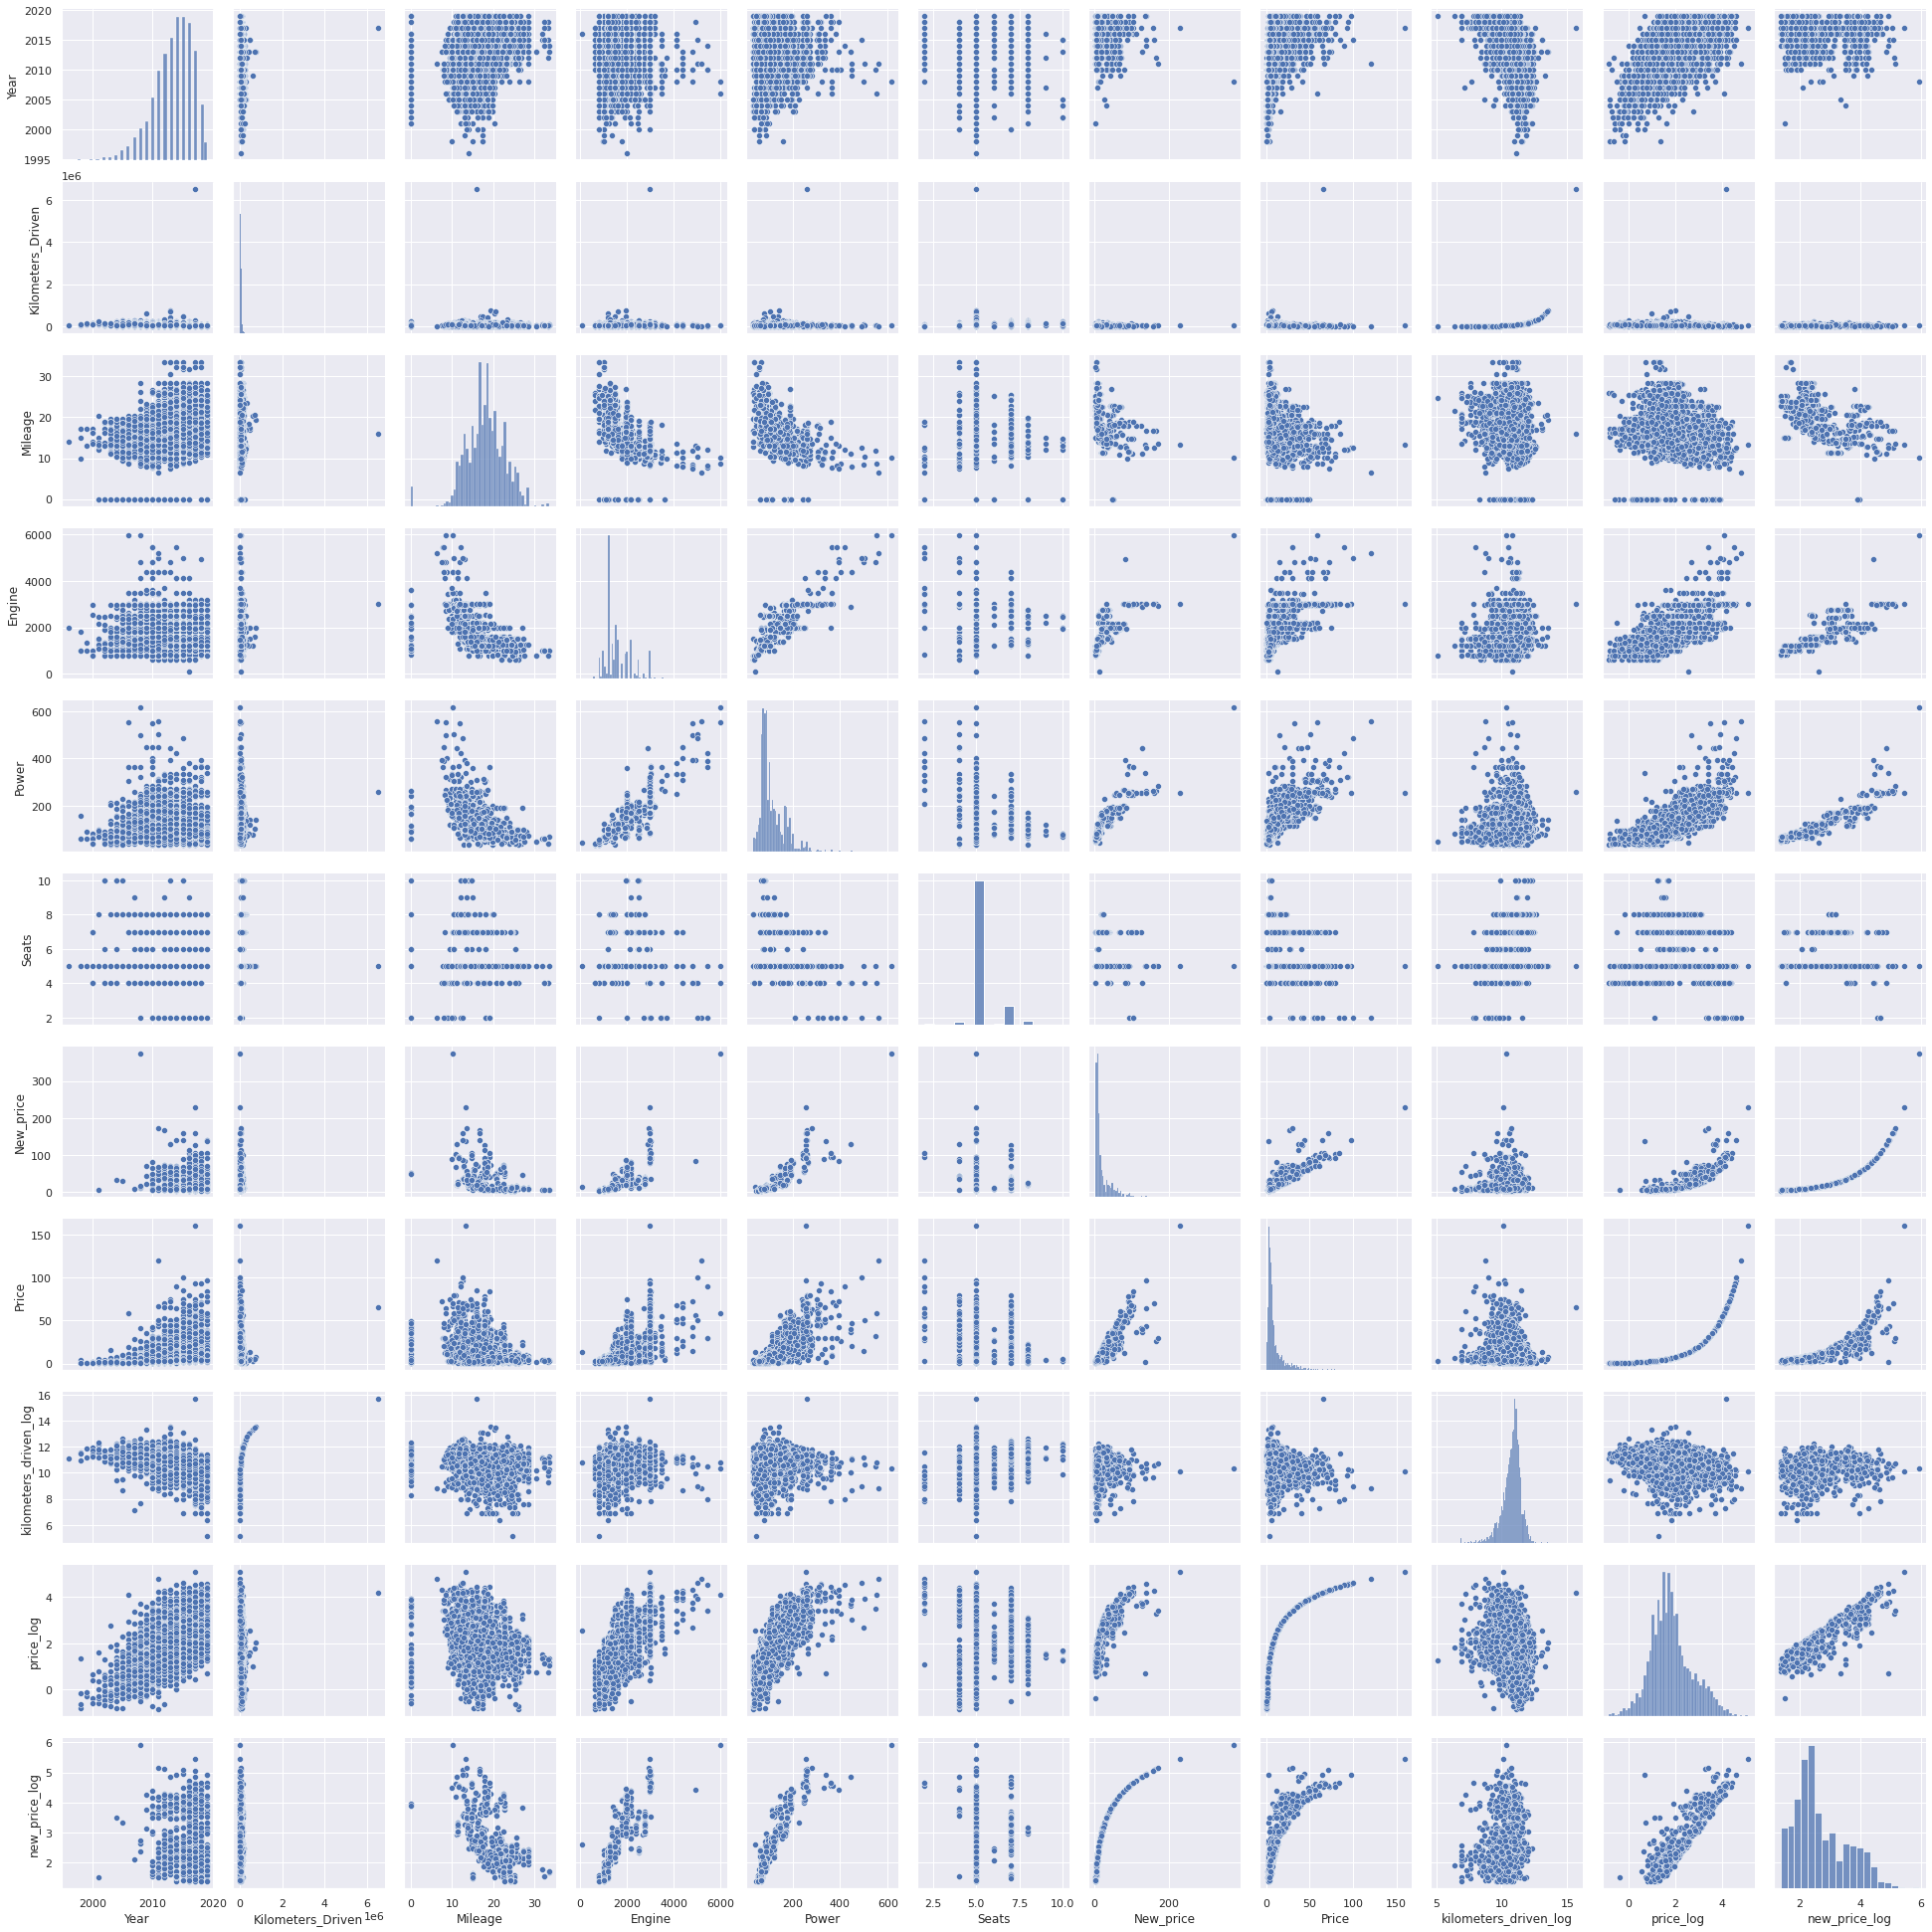

In [154]:
sns.pairplot(df)
plt.show()

**Observations:**
* It is visible from the scatterplots that none of the independent variables forms an accurate linear shape with the dependent variable Price.
* The above statement implies that the best regression model to achieve the project objective might not be linear. A linear model might not be able to efficiently explain the data in terms of variability, prediction accuracy, etc.

#### Checking correlation between numerical variables

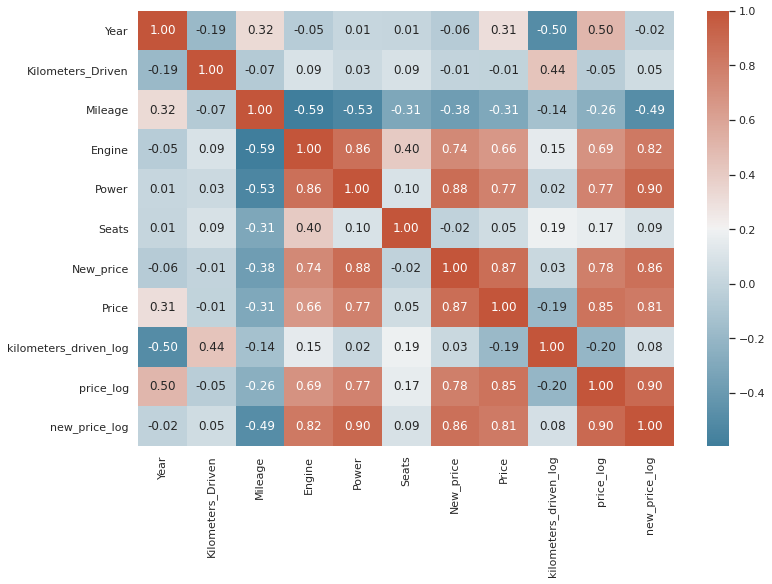

In [155]:
#Plot the correlation heatmap between numerical variables
plt.figure(figsize=(12,8))
color_map = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap=color_map )
plt.show()

**Observations:**

___Positive correlation___

* As expected, `Price` and `New_price` are highly correlated. Needless to say, the same correlation exists between `price_log` and `new_price_log`.
* There is also a high correlation between `Power` and `Price`/`New_price`. Same goes for Engine.
* Both `Power` and `Engine` have a higher impact on the new price, rather than the second-hand price.
* Understandably, `Power` is also highly correlated with `Engine` - the bigger the engine, the more power it produces.
* There seems to be some correlation between `Engine` and `Seats`, which can be explained by the fact that bigger cars typically have bigger engines as well.
* `Year` is positively correlated with `Price`, although not as strong as one would expect. At the same time it has only minor correlation with `New_price`, which looks right as older cars don't have new price at all.
* There is also a positive correlation between `Kilometers_Driven` and `Seats`. This seems reasonable as family cars like big sedans and SUVs tend to be driven more long haul than smaller city-type vehicles.

___Negative correlation___

* There is clearly a negative correlation between `Engine` and `Mileage`, as well as between `Power` and `Mileage`. This can be easily explained by the higher fuel consumption of more powerful engines.
* `Mileage` is also negatively correlated with `New_price`, which comes to show that more powerful and thus less fuel efficient cars, are generally more expensive than vehicles with lower consumption.
* As expected, `Kilometers_Driven` is negatively correlated with `Year` as newer cars have been driven far less than older ones.
* `Seats` is negatively correlated with `Mileage`, which is not a surprise as bigger cars consume more fuel.
* There is a negative correlation between `Kilometers_Driven_log` and `Year` as well.

___No correlation___

* The heatmap shows that `Seats` has really low impact on `Price` and `New_price`.
* `Seats` also seems to have very low relationship with `Power`.
* Normally, `Year` is not correlated with `Seats`, `Power`, and `Engine`. The only way to have some correlation here would be if cars of a particular size or say with more powerful engines stop being produced at one point.
* `Kilometers_Driven` is not correlated with `New_price`, which can be explained by the fact that new cars either haven't been driven yet, or have only a few kilometers on them.

#### Checking the relationship between highly correlated features (> 0.7)

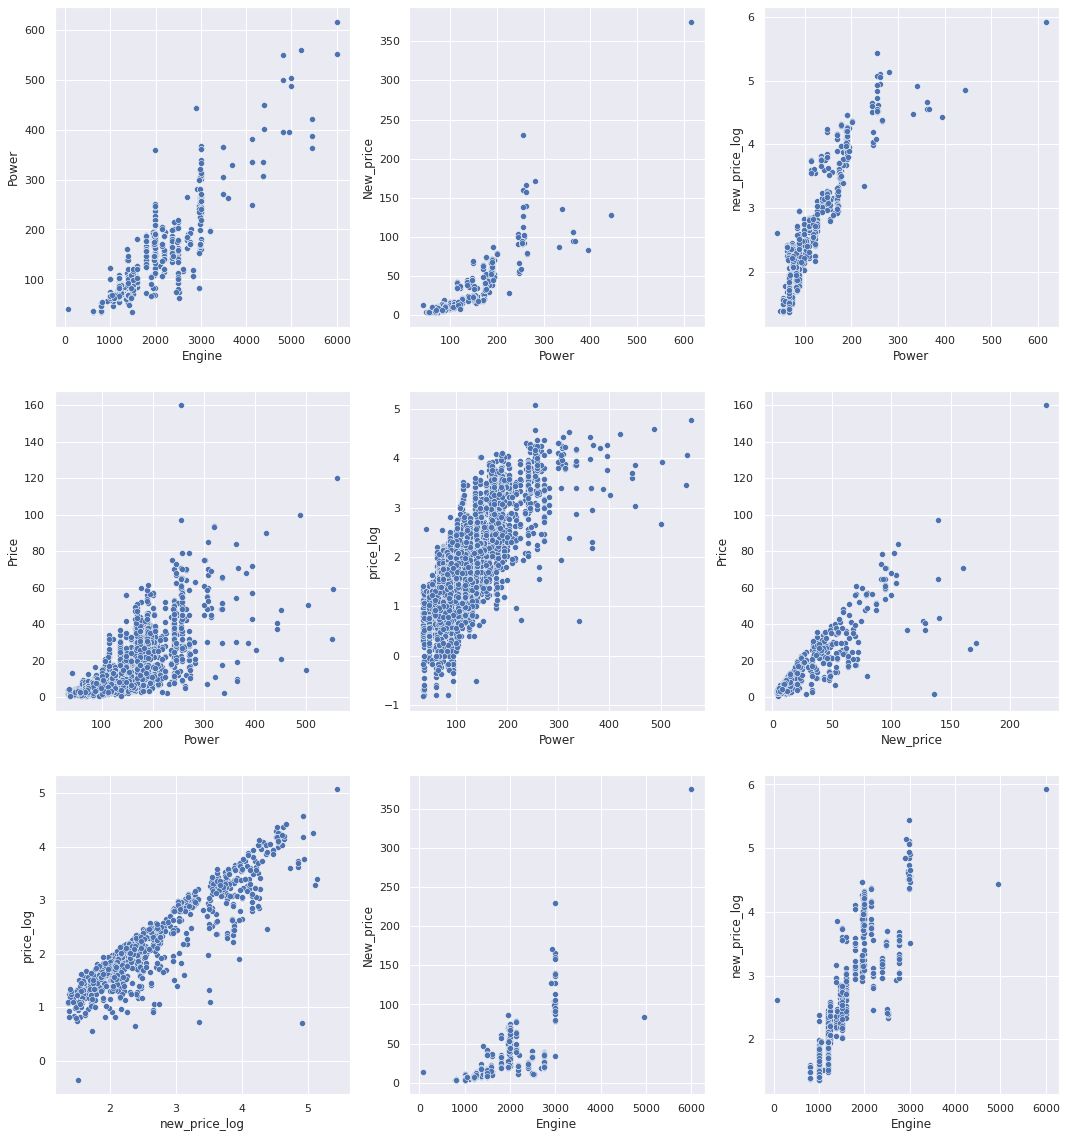

In [156]:
#Scatterplots to visualize the relationships between:

fig, axs = plt.subplots(3, 3, figsize=(18, 20))

#`Engine` and `Power`
sns.scatterplot(data=df, x='Engine', y='Power', ax=axs[0,0])

#`Power` and `New_price`
sns.scatterplot(data=df, x='Power', y='New_price', ax=axs[0,1])

#`Power` and `new_price_log`
sns.scatterplot(data=df, x='Power', y='new_price_log', ax=axs[0,2])

#`Power` and `Price`
sns.scatterplot(data=df, x='Power', y='Price', ax=axs[1,0])

#`Power` and `price_log`
sns.scatterplot(data=df, x='Power', y='price_log', ax=axs[1,1])

#`New_price` and `Price`
sns.scatterplot(data=df, x='New_price', y='Price', ax=axs[1,2])

#`new_price_log` and `price_log`
sns.scatterplot(data=df, x='new_price_log', y='price_log', ax=axs[2,0])

#`Engine` and `New_price`2
sns.scatterplot(data=df, x='Engine', y='New_price', ax=axs[2,1])

#`Engine` and `new_price_log`
sns.scatterplot(data=df, x='Engine', y='new_price_log', ax=axs[2,2])

plt.show()

**Observations:**

* `Engine` and `Power` - The scatter plot shows that power increases significantly at engine size 3000 CC. The few outliers are also visible.
* `Power` and `New_price` - The new price increases considerably after 200 BHP. There are a few outliers here as well.
* `Power` and `Price` - The vast majority of vehicles is concentrated in the area 50-200 BHP, 1k-40k Rupee.
* `New_price` and `Price` - The relationship between these two variables seems right as new price is always higher than the second-hand price. It is well know that a new car usually loses around half of its price once it is taken out of the showroom. Here that percentage is closer to 60. There is one outlier.
* `Engine` and `New_price` - Since there is a very high correlation between horsepower and new price, this plot is very similar to the one between `Engine` and `Power`. We can see the same threshold around 3000 CC at which new price jumps significantly. Outliers appear here as well.

* Outlier treatment is not necessary as outliers are luxury/electric cars and the predictive model should be able to capture their underlying pattern as well.

### 7) Missing/Junk data treatment

In [157]:
#Drop rows with null values for `Price`
df.dropna(subset=['Price'], inplace=True)

#Replace 0 values for `Mileage` with NaN so that they can be treated as missing values.
df['Mileage'].replace(0, np.nan, inplace=True)

#Impute missing values for `Mileage`, `Engine`, and `Power` variables using median values.
df['Mileage'].fillna((df['Mileage'].median()), inplace=True)
df['Engine'].fillna((df['Engine'].median()), inplace=True)
df['Power'].fillna((df['Power'].median()), inplace=True)

In [158]:
#Check the percentage of missing values again.
(df.isnull().sum()/df.shape[0])*100

Location                  0.000000
Year                      0.000000
Kilometers_Driven         0.000000
Fuel_Type                 0.000000
Transmission              0.000000
Owner_Type                0.000000
Mileage                   0.000000
Engine                    0.000000
Power                     0.000000
Seats                     0.697790
New_price                86.310018
Price                     0.000000
Brand                     0.000000
Brand_Model               0.000000
kilometers_driven_log     0.000000
price_log                 0.000000
new_price_log            86.310018
dtype: float64

In [159]:
#Impute missing values for `New_price` using median values for `Brand_Model`.

Brand_Model_New_price = pd.DataFrame(df.groupby(['Brand_Model'])['New_price'].median())

df = df.merge(Brand_Model_New_price,on='Brand_Model',how="left")

df['New_price_x'] = df['New_price_x'].fillna(df['New_price_y'])

df.drop(["New_price_y"],inplace=True,axis=1)

df.rename(columns={'New_price_x':'New_price'},inplace=True)

In [160]:
#Impute missing values for `new_price_log` using median values for `Brand_Model`.

Brand_Model_new_price_log = pd.DataFrame(df.groupby(['Brand_Model'])['new_price_log'].median())

df = df.merge(Brand_Model_new_price_log,on='Brand_Model',how="left")

df['new_price_log_x'] = df['new_price_log_x'].fillna(df['new_price_log_y'])

df.drop(["new_price_log_y"],inplace=True,axis=1)

df.rename(columns={'new_price_log_x':'new_price_log'},inplace=True)

In [161]:
#Impute missing values for `Seats` using median values for `Brand_Model`.

Brand_Model_Seats = pd.DataFrame(df.groupby(['Brand_Model'])['Seats'].median())

df = df.merge(Brand_Model_Seats,on='Brand_Model',how="left")

df['Seats_x'] = df['Seats_x'].fillna(df['Seats_y'])

df.drop(["Seats_y"],inplace=True,axis=1)

df.rename(columns={'Seats_x':'Seats'},inplace=True)

In [162]:
#Final check of missing values after imputations.
(df.isnull().sum()/df.shape[0])*100

Location                  0.000000
Year                      0.000000
Kilometers_Driven         0.000000
Fuel_Type                 0.000000
Transmission              0.000000
Owner_Type                0.000000
Mileage                   0.000000
Engine                    0.000000
Power                     0.000000
Seats                     0.049842
New_price                21.033394
Price                     0.000000
Brand                     0.000000
Brand_Model               0.000000
kilometers_driven_log     0.000000
price_log                 0.000000
new_price_log            21.033394
dtype: float64

**Observations:**

* Missing values for `New_price` / `new_price_log` have been reduced from 86% to 21%.
* Missing values for `Seats` dropped from 0.7% to only 0.05%.
* We were not able to impute all missing values because some Brand/Model combinations (e.g., 'Maruti Estilo') had no corresponding values for `New_price` / `new_price_log` and/or `Seats` in the original dataset.
* Rows with missing values can be dropped now.

In [163]:
#Drop rows with null values for `New_price`. This will also take care of missing values in `new_price_log`.
df.dropna(subset=['New_price'], inplace=True)

#Drop rows with null values for `Seats`
df.dropna(subset=['Seats'], inplace=True)

In [164]:
#Check summary statistics for the reduced dataset.
Summary = df.describe().T
Summary['Std %'] = Summary['std']/Summary['mean']
Summary.style.format({'count': '{0:}', 'mean': '{0:.2f}', 'std': '{0:.2f}', 'min': '{0:.2f}', '25%': '{0:.2f}', '50%': '{0:.2f}', '75%': '{0:.2f}', 'max': '{0:.2f}', 'Std %': '{:.2%}'})

,count,mean,std,min,25%,50%,75%,max,Std %
Year,4753.0,2013.82,3.07,1998.00,2012.00,2014.00,2016.00,2019.00,0.15%
Kilometers_Driven,4753.0,55790.75,37441.67,171.00,32298.00,51000.00,70536.00,775000.00,67.11%
Mileage,4753.0,18.63,4.15,8.20,16.00,18.50,21.56,33.54,22.28%
Engine,4753.0,1615.89,565.17,72.00,1198.00,1497.00,1968.00,4951.00,34.98%
Power,4753.0,113.19,48.91,38.40,81.80,98.60,138.10,550.00,43.21%
Seats,4753.0,5.28,0.74,2.00,5.00,5.00,5.00,9.00,14.05%
New_price,4753.0,22.34,25.08,3.91,7.88,11.89,23.98,230.00,112.27%
Price,4753.0,9.80,10.50,0.65,4.00,6.01,10.85,160.00,107.23%
kilometers_driven_log,4753.0,10.72,0.73,5.14,10.38,10.84,11.16,13.56,6.77%
price_log,4753.0,1.92,0.80,-0.43,1.39,1.79,2.38,5.08,41.60%


In [165]:
#Summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
Location,4753,11,Mumbai,648
Fuel_Type,4753,5,Diesel,2594
Transmission,4753,2,Manual,3353
Owner_Type,4753,4,First,4009
Brand,4753,24,Maruti,1011
Brand_Model,4753,107,Maruti Swift,353


In [166]:
#Obtain basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4753 entries, 0 to 6017
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               4753 non-null   object 
 1   Year                   4753 non-null   int64  
 2   Kilometers_Driven      4753 non-null   int64  
 3   Fuel_Type              4753 non-null   object 
 4   Transmission           4753 non-null   object 
 5   Owner_Type             4753 non-null   object 
 6   Mileage                4753 non-null   float64
 7   Engine                 4753 non-null   float64
 8   Power                  4753 non-null   float64
 9   Seats                  4753 non-null   float64
 10  New_price              4753 non-null   float64
 11  Price                  4753 non-null   float64
 12  Brand                  4753 non-null   object 
 13  Brand_Model            4753 non-null   object 
 14  kilometers_driven_log  4753 non-null   float64
 15  pric

**Observations:**
* The resulting dataset contains 4753 rows and 17 columns.
* There are no missing values.

* Missing values treatment had an overall impact on the Standard Deviation. This is more noticeable for `Kilometers_Driven` (decreased by 77%), `Price` (decreased by 11%), and `New_price` (decreased by 10%).
* The outlier in `Kilometers_Driven` (6,500,00 km) is no longer present in the dataset.

### 8) Modeling

#### Apply One-hot Encoding and split the dataset

In [167]:
#Separate the Dependent and Indepedent variables.
##Drop `Kilometers_Driven` and `New_price` as we are going to use the Log-transformed versions of these features.
y = df[['Price', 'price_log']]
X = df.drop(['Price','price_log','Kilometers_Driven', 'New_price'],axis=1)

#Create dummy variables for all categorical variables
X = pd.get_dummies(X, drop_first=True)

In [168]:
#Split the data into Train and Test in a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

**Observations:**
* Dummy numerical variables have been created for each separate category in categorical variables. The first category from each categorical variable is removed to become a "reference variable". At a later stage, the reference variable will help to interpret the linear regression.

#### Perform scaling

In [169]:
#Create an instance of MinMaxScaler
Scaler = MinMaxScaler()

#Apply fit_transform on `X_train`
X_train_scaled = Scaler.fit_transform(X_train)

#Convert from an array back to a dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_train_scaled.head()

,Year,Mileage,Engine,Power,Seats,kilometers_driven_log,new_price_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_BMW,Brand_Datsun,Brand_Fiat,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Brand_Model_Audi A4,Brand_Model_Audi A6,Brand_Model_Audi Q3,Brand_Model_Audi Q7,Brand_Model_Audi RS5,Brand_Model_BMW 3,Brand_Model_BMW 5,Brand_Model_BMW 7,Brand_Model_BMW X1,Brand_Model_BMW X3,Brand_Model_Datsun GO,Brand_Model_Datsun redi-GO,Brand_Model_Fiat Linea,Brand_Model_Ford Aspire,Brand_Model_Ford EcoSport,Brand_Model_Ford Ecosport,Brand_Model_Ford Endeavour,Brand_Model_Ford Figo,Brand_Model_Ford Freestyle,Brand_Model_Ford Mustang,Brand_Model_Honda Amaze,Brand_Model_Honda BR-V,Brand_Model_Honda BRV,Brand_Model_Honda Brio,Brand_Model_Honda CR-V,Brand_Model_Honda City,Brand_Model_Honda Jazz,Brand_Model_Honda WR-V,Brand_Model_Honda WRV,Brand_Model_Hyundai Creta,Brand_Model_Hyundai Elantra,Brand_Model_Hyundai Elite,Brand_Model_Hyundai Grand,Brand_Model_Hyundai Santro,Brand_Model_Hyundai Tucson,Brand_Model_Hyundai Verna,Brand_Model_Hyundai Xcent,Brand_Model_Hyundai i20,Brand_Model_Isuzu MUX,Brand_Model_Jaguar XE,Brand_Model_Jaguar XF,Brand_Model_Jeep Compass,Brand_Model_Land Rover,Brand_Model_Mahindra Bolero,Brand_Model_Mahindra E,Brand_Model_Mahindra KUV,Brand_Model_Mahindra NuvoSport,Brand_Model_Mahindra Thar,Brand_Model_Mahindra Verito,Brand_Model_Mahindra XUV300,Brand_Model_Mahindra XUV500,Brand_Model_Mahindra Xylo,Brand_Model_Maruti Alto,Brand_Model_Maruti Baleno,Brand_Model_Maruti Celerio,Brand_Model_Maruti Ciaz,Brand_Model_Maruti Dzire,Brand_Model_Maruti Eeco,Brand_Model_Maruti Ertiga,Brand_Model_Maruti Ignis,Brand_Model_Maruti S-Cross,Brand_Model_Maruti Swift,Brand_Model_Maruti Vitara,Brand_Model_Maruti Wagon,Brand_Model_Mercedes-Benz A,Brand_Model_Mercedes-Benz C-Class,Brand_Model_Mercedes-Benz CLA,Brand_Model_Mercedes-Benz E-Class,Brand_Model_Mercedes-Benz GLA,Brand_Model_Mercedes-Benz GLC,Brand_Model_Mercedes-Benz GLE,Brand_Model_Mercedes-Benz GLS,Brand_Model_Mercedes-Benz New,Brand_Model_Mercedes-Benz S-Class,Brand_Model_Mercedes-Benz SLC,Brand_Model_Mini Clubman,Brand_Model_Mini Cooper,Brand_Model_Mitsubishi Pajero,Brand_Model_Nissan Micra,Brand_Model_Nissan Sunny,Brand_Model_Nissan Terrano,Brand_Model_Porsche Cayenne,Brand_Model_Renault Duster,Brand_Model_Renault KWID,Brand_Model_Skoda Octavia,Brand_Model_Skoda Rapid,Brand_Model_Skoda Superb,Brand_Model_Tata Bolt,Brand_Model_Tata Hexa,Brand_Model_Tata Nexon,Brand_Model_Tata Safari,Brand_Model_Tata Tiago,Brand_Model_Tata Tigor,Brand_Model_Tata Zest,Brand_Model_Toyota Camry,Brand_Model_Toyota Corolla,Brand_Model_Toyota Etios,Brand_Model_Toyota Fortuner,Brand_Model_Toyota Innova,Brand_Model_Toyota Platinum,Brand_Model_Volkswagen Ameo,Brand_Model_Volkswagen Polo,Brand_Model_Volkswagen Tiguan,Brand_Model_Volkswagen Vento,Brand_Model_Volvo S60,Brand_Model_Volvo V40
4277,0.714286,0.465667,0.437474,0.134676,0.428571,0.638679,0.577319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [170]:
#Apply fit_transform on `X_test`
X_test_scaled = Scaler.fit_transform(X_test)

#Convert from an array back to a dataframe
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

**Observations:**
* Dummy numerical variables are scaled to have the same range.
* This way the model will not be biased towards variables with higher range, which wouldn't allow the model to learn from variables with lower range.

### 8.1) Start with a Linear Regression model

In [171]:
#Select the Log-transformed price for the target variable
y_train_log = y_train['price_log']
y_test_log = y_test['price_log']

#Add the intercept terms
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

#Use the Ordinary Least Squares (OLS) algorithm on `y_train_log` and `X_train_scaled`
OLS_model = sm.OLS(y_train_log, X_train_scaled)

#Fit the model
OLS_model_res = OLS_model.fit()

#Print the model summary
print(OLS_model_res.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     530.4
Date:                Wed, 18 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:36:10   Log-Likelihood:                 1234.9
No. Observations:                3327   AIC:                            -2214.
Df Residuals:                    3199   BIC:                            -1432.
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

**Observations:**
* `R-squared` for the model is **0.955** and `Adj. R-squared` is at **0.953** which indicates a very good fit.
* Not all independent variables (or categories of categorical variables) are statistically significant or have predictive power to predict the dependent variable. As a next step, we are going to select features, based on their `p-value` (<0.05).
* `Prob (F-statistic)` has a p-value of 0, which implies that the model fit is statistically significant.

In [172]:
#Create a data frame to collect coefficients and p-values for all independent variables
OLS_model1_res = pd.DataFrame(OLS_model_res.params, columns=['coef'])
OLS_model1_res['pval'] = OLS_model_res.pvalues

In [173]:
#Filter by significant p-value (<0.05) and sort descending
OLS_model1_res = OLS_model1_res.sort_values(by="pval", ascending=False)
pval_filter = OLS_model1_res['pval']<=0.05
OLS_model1_res[pval_filter]

,coef,pval
Brand_Model_Jaguar XF,1.184613e-01,4.984198e-02
Brand_Model_Maruti Swift,4.815681e-02,4.078516e-02
Brand_Model_Tata Tigor,-1.720347e-01,3.670267e-02
Brand_Model_Porsche Cayenne,-1.599772e-01,3.168640e-02
Brand_Porsche,-1.599772e-01,3.168640e-02
Brand_Model_Hyundai Santro,-1.803725e-01,2.654729e-02
Location_Chennai,4.352338e-02,2.530317e-02
Brand_Model_Mahindra NuvoSport,-2.580959e-01,2.320693e-02
Brand_Model_Maruti Ignis,-1.875249e-01,2.305281e-02
Brand_Model_Nissan Sunny,-1.098026e-01,1.960570e-02


In [174]:
#Create a list with statistically significant variables only
imp_vars = OLS_model1_res[pval_filter].index.tolist()

#Get corresponding original variables names (before one-hot encoding)
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in df.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)
 

start = '\033[5m'
end = '\033[96m'
print(start+'Statistically significant varaibles for Linear Regression'+end,':\n',sig_var)

Statistically significant varaibles for Linear Regression :
 ['Brand', 'Brand_Model', 'Location', 'Fuel_Type', 'Engine', 'new_price_log', 'Owner_Type', 'Transmission', 'Power', 'kilometers_driven_log', 'Year']


### 8.2) Feature Selection

In [175]:
#Drop irrelevant features
X_train1_scaled = X_train_scaled.drop(['Mileage', 'Seats'], axis=1)

In [176]:
#Re-build the Linear Regression model
X_train1_scaled = sm.add_constant(X_train1_scaled)
OLS_model2 = sm.OLS(y_train_log, X_train1_scaled)
OLS_model2_res = OLS_model2.fit()

print(OLS_model2_res.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     539.0
Date:                Wed, 18 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:36:11   Log-Likelihood:                 1234.1
No. Observations:                3327   AIC:                            -2216.
Df Residuals:                    3201   BIC:                            -1446.
Df Model:                         125                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

**Observations:**
* `R-squared` and `Adj. R-squared` remain unchanged.
* It comes to say that variables `Mileage` and `Seats` were not adding any value to the model.

### 8.3) Checking assumptions of Linear Regression

**Key assumptions:**
* **Linearity** (Linear relationship) - The relationship between X and the mean of y is linear.
* **Normality** (Normality of error terms/residuals) - For any fixed value of X, y is normally distributed.
* **No multicollinearity** - There must be no perfect/exact relationship among independent variables.
* **Homoscedasticity** - The variance of residuals is the same for any value of X.
* **The mean of residuals is zero**

### 8.3.1) Checking for Linearity between independent and dependent variables

* We'll use a Residual Plot to assess whether or not the linear regression model is appropriate for this particular dataset.
* Residuals must not form a strong pattern. They should be randomly and uniformly scattered on the X-axis.

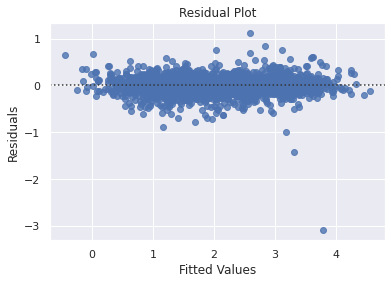

In [177]:
#Obtain residuals
OLS_residuals = OLS_model2_res.resid

#Obtain fitted values
OLS_fitted = OLS_model2_res.fittedvalues

#Create the Residual Plot
sns.residplot(x = OLS_fitted, y = OLS_residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")

plt.show()

**Observations:**
* There seems to be no particular pattern between the residuals and the fitted values on the Residual Plot, therefore we can say that the linearity assumption is satisfied.

### 8.3.2) Checking Normality
* Violations of normality create problems determining whether model coefficients are significantly different from zero and for calculating confidence intervals for forecasts.
* A significant violation of the normal distribution assumption is often a "red flag" indicating that there is some other problem with the model assumptions and/or that there are a few unusual data points that should be studied closely, and/or that a better model is still waiting out there.

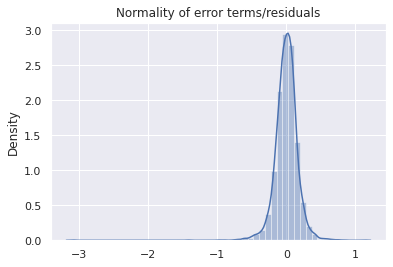

In [178]:
#Visualize the residuals on a Distplot
Normality_check = sns.distplot(OLS_residuals,kde=True)
Normality_check = plt.title('Normality of error terms/residuals')

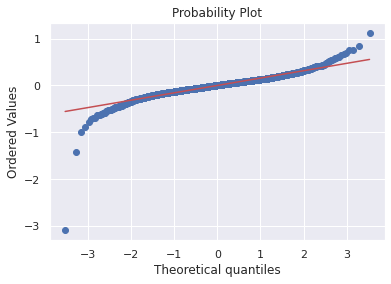

In [179]:
#Visualize residuals on a Quantile-Quantile Probability plot
stat.probplot(OLS_residuals, dist="norm", plot=pylab)
plt.show()

**Observations:**
* The error terms are almost perfectly normally distributed for the number of test points we took.
* The points on the Probability plot above form a nearly linear pattern, which indicates that the dataset follows a normal distribution.

### 8.3.3) Checking Multicollinearity

* Multicollinearity generally is a problem because it undermines the statistical significance of an independent variable.
* However, multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. Therefore, for the sake of making predictions alone (no need to understand the role of each independent variable), some multicollinearity in the data is still acceptable.


* There are different ways of detecting multicollinearity. In this case, we'll use Variance Inflation Factor (VIF).
* The Variance Inflation Factor quantifies the extent of correlation between one predictor and the other predictors in a model. Higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a model.
* Features having a VIF score > 5 will be dropped/treated until all the features have a VIF score < 5.

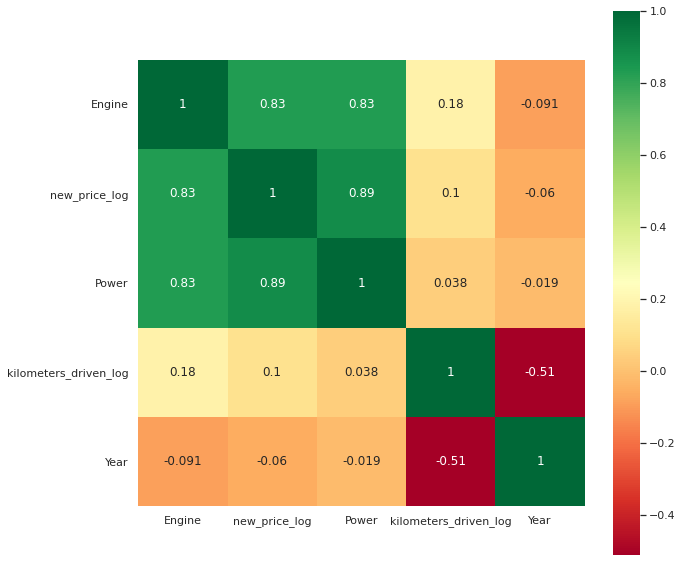

In [180]:
#Select only continuous independent variables
X_train1_scaled_select = X_train1_scaled[['Engine', 'new_price_log', 'Power', 'kilometers_driven_log', 'Year']]

#Visualize the correlation between variables on a heatmap 
plt.figure(figsize=(10,10))
p=sns.heatmap(X_train1_scaled_select.corr(), annot=True,cmap='RdYlGn',square=True)

**Observations:**
* Obviously, there is a very strong positive correlation between `Engine` and `Power`.
* Both of them are also strongly correlated with `new_price_log`.
* Next, let's observe their VIF scores to decide whether to keep those variables or not.

In [181]:
#Check VIF
vif_series = pd.Series([variance_inflation_factor(X_train1_scaled.values,i) for i in range(X_train1_scaled.shape[1])],
                        index=X_train1_scaled.columns)
print('VIF scores: \n\n{}\n'.format(vif_series))

VIF scores: 

const                                5160.179342
Year                                    2.419562
Engine                                 18.239490
Power                                  14.424525
kilometers_driven_log                   1.988606
new_price_log                         418.027431
Location_Bangalore                      2.618371
Location_Chennai                        3.093728
Location_Coimbatore                     3.907176
Location_Delhi                          3.588645
Location_Hyderabad                      3.993004
Location_Jaipur                         2.752103
Location_Kochi                          4.053099
Location_Kolkata                        3.235826
Location_Mumbai                         4.464447
Location_Pune                           3.474826
Fuel_Type_Diesel                       36.789417
Fuel_Type_Electric                           inf
Fuel_Type_LPG                           1.217227
Fuel_Type_Petrol                       35.297129
Transm

**Observations:**
* Since variable `Engine` has the highest VIF score, it should be removed.

In [182]:
#Re-build the model after removing `Engine`
X_train2_scaled = X_train1_scaled.drop(['Engine'], axis=1)

In [183]:
OLS_model3 = sm.OLS(y_train_log, X_train2_scaled)
OLS_model3_res = OLS_model3.fit()

print(OLS_model3_res.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     540.5
Date:                Wed, 18 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:36:24   Log-Likelihood:                 1225.3
No. Observations:                3327   AIC:                            -2201.
Df Residuals:                    3202   BIC:                            -1437.
Df Model:                         124                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

**Observations:**
* `R-squared` decreased almost unnoticeably to **0.954**, but the adjusted value remained **0.953**, showing that `Engine` was not adding real value to the model.

In [184]:
#Check VIF again
vif_series = pd.Series([variance_inflation_factor(X_train2_scaled.values,i) for i in range(X_train2_scaled.shape[1])],
                        index=X_train2_scaled.columns)
print('VIF scores: \n\n{}\n'.format(vif_series))

VIF scores: 

const                                5068.169292
Year                                    2.328969
Power                                   8.930057
kilometers_driven_log                   1.988103
new_price_log                         417.655752
Location_Bangalore                      2.617774
Location_Chennai                        3.093298
Location_Coimbatore                     3.906951
Location_Delhi                          3.588276
Location_Hyderabad                      3.992509
Location_Jaipur                         2.751984
Location_Kochi                          4.053067
Location_Kolkata                        3.235488
Location_Mumbai                         4.464440
Location_Pune                           3.474472
Fuel_Type_Diesel                       36.784290
Fuel_Type_Electric                           inf
Fuel_Type_LPG                           1.217223
Fuel_Type_Petrol                       35.240408
Transmission_Manual                     2.598410
Owner_

**Observations:**
* VIF scores for `Power` (8.93) and `new_price_log` (417.66) remain too high, therefore these variables can be removed too.

In [185]:
#Re-build the model after removing `new_price_log`
X_train3_scaled = X_train2_scaled.drop(['new_price_log'], axis=1)

OLS_model4 = sm.OLS(y_train_log, X_train3_scaled)
OLS_model4_res = OLS_model4.fit()

print(OLS_model4_res.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     541.7
Date:                Wed, 18 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:36:35   Log-Likelihood:                 1215.5
No. Observations:                3327   AIC:                            -2183.
Df Residuals:                    3203   BIC:                            -1425.
Df Model:                         123                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

**Observations:**
* `R-squared` remained the same at **0.954** and decreased very slightly to 0.952 for the adjusted metric, proving that `new_price_log` was also not adding value to the model.

In [186]:
#Final VIF check
vif_series = pd.Series([variance_inflation_factor(X_train3_scaled.values,i) for i in range(X_train3_scaled.shape[1])],
                        index=X_train3_scaled.columns)
print('VIF scores: \n\n{}\n'.format(vif_series))

VIF scores: 

const                                1597.781750
Year                                    2.328348
Power                                   8.901661
kilometers_driven_log                   1.982178
Location_Bangalore                      2.600270
Location_Chennai                        3.081188
Location_Coimbatore                     3.869095
Location_Delhi                          3.581965
Location_Hyderabad                      3.971343
Location_Jaipur                         2.744350
Location_Kochi                          4.046640
Location_Kolkata                        3.233390
Location_Mumbai                         4.435740
Location_Pune                           3.455702
Fuel_Type_Diesel                       36.773788
Fuel_Type_Electric                           inf
Fuel_Type_LPG                           1.217215
Fuel_Type_Petrol                       35.231379
Transmission_Manual                     2.549790
Owner_Type_Fourth & Above               1.017619
Owner_

**Observations:**
* Some multicollinearity still exists in the data as some categories of independent variables have a VIF score higher than 5.
* `Power` has a VIF score of 8.90. However, the two other independent variables that `Power` was highly correlated with, are no longer in the model, hence we can keep this one for higher predictive power.
* All independent variables in the current model are statistically significant, therefore removing any of them would only deteriorate the model's performance.

### 8.3.4) Checking for Homoscedasticity

* Homoscedasticity means that the residuals have equal or almost equal variance across the regression line
* By plotting the error terms with predicted terms we can check if there is any pattern in the error terms.


* We will use Goldfeld–Quandt test to check if homoscedasticity is present.


* **Null Hypothesis:** Residuals are homoscedastic
* **Alternative Hypothesis:** Residuals are hetroscedastic

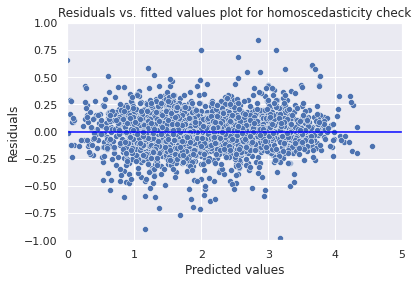

In [187]:
#Get predicted values
y_train_pred = OLS_model4_res.predict(X_train3_scaled)

#Plot the error terms against the predicted values to check for a definite pattern (linear/quadratic/funnel shaped)
p = sns.scatterplot(y_train_pred, OLS_residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.ylim(-1,1)
plt.xlim(0,5)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs. fitted values plot for homoscedasticity check')

In [188]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train_log, X_train3_scaled)
lzip(name, test)

[('F statistic', 0.7234965761155047), ('p-value', 0.9999999998903949)]

**Observations:**
* Clearly, no definite pattern exists between predicted values and residuals.
* The test shows that `p-value` is much higher than 0.05, therefore we fail to reject the null hypothesis. Residuals are indeed homoscedastic.

### 8.3.5) Checking the mean of residuals

* The mean of the residuals should be zero.

In [189]:
#Display the mean of Residuals
OLS_residuals_mean = np.mean(OLS_residuals)
print("Mean of Residuals {}".format(OLS_residuals_mean))

Mean of Residuals -3.0465560942644514e-15


**Observations:**
* The mean of residuals is practically zero, therefore the corresponding assumption is satisfied as well.


* **All assumptions of the Linear Regression model have been verified.**

### 8.4) Checking model performance on the train and test data

#### Prepare the test dataset to predict the output

In [190]:
#Select only columns that exist in the train dataset
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train3_scaled.columns)

#### Evaluate model performance using key metrics

In [191]:
#Create a function to calculate and display key model performance metrics on train and test data
def model_score(model, flag=True):
    
    #Create an empty list to store train and test results
    score_list=[]
    
    #Convert the log scale predictions to their original scale, i.e. taking exponentials
    pred_train_log = model.predict(X_train3_scaled)
    pred_train_exp = np.exp(pred_train_log)
    pred_test_log = model.predict(X_test_scaled)
    pred_test_exp = np.exp(pred_test_log)
    
    train_r2 = []
    test_r2 = []
    train_mse = []
    test_mse = []
    train_rmse = []
    test_rmse = []
    train_mae = []
    test_mae = []
    train_mape = []
    test_mape = []
    
    train_r2 = round(metrics.r2_score(y_train['Price'],pred_train_exp),2)
    test_r2 = round(metrics.r2_score(y_test['Price'],pred_test_exp),2)
    train_mse = round(metrics.mean_squared_error(y_train['Price'],pred_train_exp),2)
    test_mse = round(metrics.mean_squared_error(y_test['Price'],pred_test_exp),2)
    train_rmse = round(np.sqrt(metrics.mean_squared_error(y_train['Price'],pred_train_exp)),2)
    test_rmse = round(np.sqrt(metrics.mean_squared_error(y_test['Price'],pred_test_exp)),2)
    train_mae = round(metrics.mean_absolute_error(y_train['Price'],pred_train_exp),2)
    test_mae = round(metrics.mean_absolute_error(y_test['Price'],pred_test_exp),2)
    train_mape = round(np.mean(np.abs((y_train['Price'] - pred_train_exp)) / y_train['Price']) * 100, 2)
    test_mape = round(np.mean(np.abs((y_test['Price'] - pred_test_exp)) / y_test['Price']) * 100, 2)
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_mse,test_mse,train_rmse,test_rmse,train_mae,test_mae,train_mape,test_mape))
    
    #Only if the flag is set to True, the results will be printed out. Default value is "True".
    if flag==True: 
        print("R-squared on train : ",round(metrics.r2_score(y_train['Price'],pred_train_exp),2))
        print("R-squared on test : ",round(metrics.r2_score(y_test['Price'],pred_test_exp),2))
        print("MSE on train : ",round(metrics.mean_squared_error(y_train['Price'],pred_train_exp),2))
        print("MSE on test : ",round(metrics.mean_squared_error(y_test['Price'],pred_test_exp),2))
        print("RMSE on train : ",round(np.sqrt(metrics.mean_squared_error(y_train['Price'],pred_train_exp)),2))
        print("RMSE on test : ",round(np.sqrt(metrics.mean_squared_error(y_test['Price'],pred_test_exp)),2))
        print("MAE on train : ",round(metrics.mean_absolute_error(y_train['Price'],pred_train_exp),2))
        print("MAE on test : ",round(metrics.mean_absolute_error(y_test['Price'],pred_test_exp),2))
        print("MAPE on train : ",round(np.mean(np.abs((y_train['Price'] - pred_train_exp)) / y_train['Price']) * 100, 2))
        print("MAPE on test : ",round(np.mean(np.abs((y_test['Price'] - pred_test_exp)) / y_test['Price']) * 100, 2))
        
    #Return the list with scores
    return score_list

In [192]:
#Display key metrics
LR_score = model_score(OLS_model4_res)

R-squared on train :  0.93
R-squared on test :  0.89
MSE on train :  7.1
MSE on test :  14.68
RMSE on train :  2.66
RMSE on test :  3.83
MAE on train :  1.18
MAE on test :  1.45
MAPE on train :  12.38
MAPE on test :  13.26


### 8.5) Evaluate and compare other regression models

#### 8.5.1) Ridge Regression

In [193]:
#Selecting the best Alpha value

##Build Ridge Regression with five possible alpha values
RRcv_model = RidgeCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0])

#Fit the model
RRcv_model_res = RRcv_model.fit(X_train3_scaled, y_train_log)

# View best Alpha value
RRcv_model_res.alpha_

0.01

In [194]:
#Build a Ridge Regression model with an Alpha value of 0.01
RR_model = Ridge(alpha=0.01)
RR_model.fit(X_train3_scaled, y_train_log)

#Display key metrics
RR_score = model_score(RR_model)

R-squared on train :  0.93
R-squared on test :  0.89
MSE on train :  7.1
MSE on test :  14.67
RMSE on train :  2.66
RMSE on test :  3.83
MAE on train :  1.18
MAE on test :  1.45
MAPE on train :  12.38
MAPE on test :  13.26


#### 8.5.2) Lasso Regression

In [195]:
#Selecting the best Alpha value

##Build Lasso Regression with five possible alpha values
Lassocv_model = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0])

#Fit the model
Lassocv_model_res = Lassocv_model.fit(X_train3_scaled, y_train_log)

# View best Alpha value
Lassocv_model_res.alpha_

0.001

In [196]:
#Build a Lasso Regression model with an Alpha value of 0.01
Lasso_model = Lasso(alpha=0.01)
Lasso_model.fit(X_train3_scaled, y_train_log)

#Display key metrics
Lasso_model_score = model_score(Lasso_model)

R-squared on train :  0.73
R-squared on test :  0.76
MSE on train :  27.66
MSE on test :  30.91
RMSE on train :  5.26
RMSE on test :  5.56
MAE on train :  2.66
MAE on test :  2.55
MAPE on train :  26.83
MAPE on test :  28.07


#### 8.5.3) ElasticNet Regression

In [197]:
#Selecting the best Alpha value

##Build ElasticNet Regression with five possible alpha values
Enetcv_model = ElasticNetCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0])

#Fit the model
Enetcv_model_res = Enetcv_model.fit(X_train3_scaled, y_train_log)

# View best Alpha value
Enetcv_model_res.alpha_

0.001

In [198]:
#Build an ElasticNet Regression with an Alpha value of 0.01.
Enet_model = ElasticNet(alpha = 0.01)
Enet_model.fit(X_train3_scaled, y_train_log)

#Display key metrics
Enet_model_score = model_score(Enet_model)

R-squared on train :  0.71
R-squared on test :  0.71
MSE on train :  30.16
MSE on test :  37.0
RMSE on train :  5.49
RMSE on test :  6.08
MAE on train :  2.73
MAE on test :  2.73
MAPE on train :  27.2
MAPE on test :  27.71


#### 8.5.4) Decision Tree Regression

In [199]:
DTree_model = DecisionTreeRegressor(random_state=1)

DTree_model.fit(X_train3_scaled,y_train_log)

Dtree_model_score = model_score(DTree_model)

R-squared on train :  1.0
R-squared on test :  0.53
MSE on train :  0.0
MSE on test :  59.7
RMSE on train :  0.03
RMSE on test :  7.73
MAE on train :  0.0
MAE on test :  3.66
MAPE on train :  0.03
MAPE on test :  36.72


#### 8.5.5) Random Forest Regression

In [200]:
RF_model = RandomForestRegressor(random_state=1,oob_score=True)

RF_model.fit(X_train3_scaled,y_train_log)

RF_model_score = model_score(RF_model)

R-squared on train :  0.98
R-squared on test :  0.78
MSE on train :  1.99
MSE on test :  28.39
RMSE on train :  1.41
RMSE on test :  5.33
MAE on train :  0.51
MAE on test :  2.58
MAPE on train :  4.92
MAPE on test :  27.36


### 8.6) Compare models' performance

In [201]:
#Get the list of models
models = [OLS_model4_res, RR_model, Lasso_model, Enet_model, DTree_model, RF_model]

#Define empty lists to hold train and test results
r2_train = []
r2_test = []
mse_train = []
mse_test = []
rmse_train = []
rmse_test = []
mae_train = []
mae_test = []
mape_train = []
mape_test = []

#Loop through all the models to get the scores
for model in models:
    i = model_score(model,False)
    r2_train.append(i[0])
    r2_test.append(i[1])
    mse_train.append(i[2])
    mse_test.append(i[3])
    rmse_train.append(i[4])
    rmse_test.append(i[5])
    mae_train.append(i[6])
    mae_test.append(i[7])
    mape_train.append(i[8])
    mape_test.append(i[9])

In [202]:
#Create a dataframe to hold model names with corresponding scores
compare_models = pd.DataFrame({'Model':['Linear','Ridge','Lasso', 'ElasticNet', 'Decision Tree', 'Random Forest'], 
                                          'R-squared train': r2_train,'R-squared test': r2_test,
                                          'MSE train':mse_train,'MSE test':mse_test,
                                          'RMSE train':rmse_train,'RMSE test':rmse_test,
                                          'MAE train':mae_train,'MAE test':mae_test,
                                          'MAPE train':mape_train,'MAPE test':mape_test}) 
compare_models

,Model,R-squared train,R-squared test,MSE train,MSE test,RMSE train,RMSE test,MAE train,MAE test,MAPE train,MAPE test
0,Linear,0.93,0.89,7.10,14.68,2.66,3.83,1.18,1.45,12.38,13.26
1,Ridge,0.93,0.89,7.10,14.67,2.66,3.83,1.18,1.45,12.38,13.26
2,Lasso,0.73,0.76,27.66,30.91,5.26,5.56,2.66,2.55,26.83,28.07
3,ElasticNet,0.71,0.71,30.16,37.00,5.49,6.08,2.73,2.73,27.20,27.71
4,Decision Tree,1.00,0.53,0.00,59.70,0.03,7.73,0.00,3.66,0.03,36.72
5,Random Forest,0.98,0.78,1.99,28.39,1.41,5.33,0.51,2.58,4.92,27.36


**Observations:**
* Both `Linear Regression` and `Random Forest` performed very well.
* However, `Linear Regression` has the edge due to a better generalized performance on train and test data.
* With Alpha at 0.01 (best value) `Ridge Regression` is almost completely matching `Linear Regression`, with one exception being the slightly better MSE result on test data.
* The `Decision Tree` is clearly over-fitting the train data and under-fitting the test data.
* `Lasso` and `ElasticNet` have a very similar performance on train and test data. They seem to generalize quite well.

### 9) Conclusions

* Our final **Linear Regression** model has an **R-squared** of **0.89** on the test data, meaning it can explain 89% variation in the data. **RMSE** on the test data is around **4**, which means the model can predict the original values quite well.
* The final model is good to be used in production.
* The most significant predictors of the price of used cars are: `Year`, `Power`, `Kilometers_Driven`, `Location`, `Fuel_Type`, `Transmission`, `Owner_Type`, and `Brand`.
* Generally speaking, the bigger the engine and the more powerful it is, the higher the car price. An interesting fact is that these two variables affect new price more than used car price.
* There seems to be some correlation between the size of the engine and the number of seats, which can be explained by the fact that bigger cars typically have bigger engines as well.
* Clearly, when it comes to car price, one of the first criteria that comes to mind, is the year of manufacture. It turns out however, that variable `Year` has much lower correlation with `Price` when compared to `Power` and `Engine`. Customers seem to care more about a car's horsepower, rather than its age.
* There is some positive correlation between `Kilometers_Driven` and `Seats`, which seems reasonable as family cars like big sedans and SUVs tend to be driven more long haul compared to smaller city-type vehicles.
* Cars with only **one owner** are generally more expensive.
* As the negative correlation proves, the bigger the engine and the more powerful it is, the more fuel it consumes, hence `Mileage` goes down.
* Interestingly, `Mileage` is also negatively correlated with `New_price`, which comes to say that more powerful and thus less fuel efficient cars, are generally more expensive than vehicles with lower consumption.
* The number of seats has a really low impact on car price – both new and used.
* The most expensive cars are sold in **Coimbatore** and **Bangalore**.
* Electric cars in general are more expensive than Diesel, however with only 2 electric vehicles in the dataset, this engine type is not well represented.

### 10) Business Insights and Recommendations

* Cars4U could benefit from investing in the following types of vehicles in this particular order:
    * Newer
    * Powerful (250+BHP)
    * Top-tier brands like: "Mercedes", "Land Rover", "Mini", "BMW", "Jaguar"
    * Diesel/Electric
    * Automatic
    * First owner
    

* Some southern markets like **Coimbatore** and **Bangalore** tend to have higher prices. It might be a good strategy to extend operations there. Markets like **Kolkata** and **Jaipur** on the other hand are quite risky and investments in these areas should be carefully re-considered.
* The cost aspect of business should be analyzed as well once we have the corresponding data.
* Going forward, the current model could be improved further, and additional models could be developed for different locations or car types as applicable.